In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

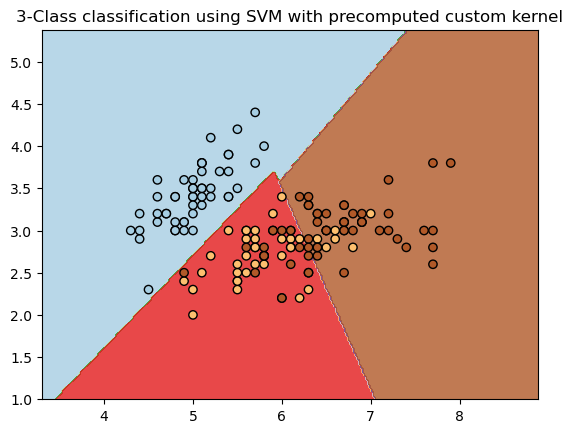

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features
Y = iris.target

def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

# Compute the kernel matrix
kernel_matrix = my_kernel(X, X)

# Create an SVM classifier with precomputed kernel
clf = svm.SVC(kernel='precomputed')
clf.fit(kernel_matrix, Y)

# For plotting decision boundaries, we need to recompute the kernel matrix for the grid points
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_kernel = my_kernel(grid, X)

# Predict and plot decision boundaries
Z = clf.predict(grid_kernel)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using SVM with precomputed custom kernel")
plt.axis("tight")
plt.show()

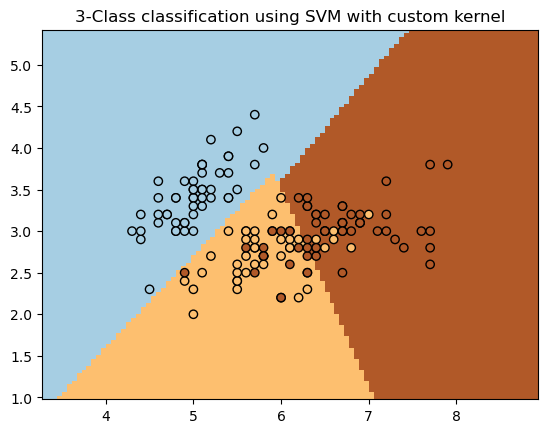

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using SVM with custom kernel")
plt.axis("tight")
plt.show()


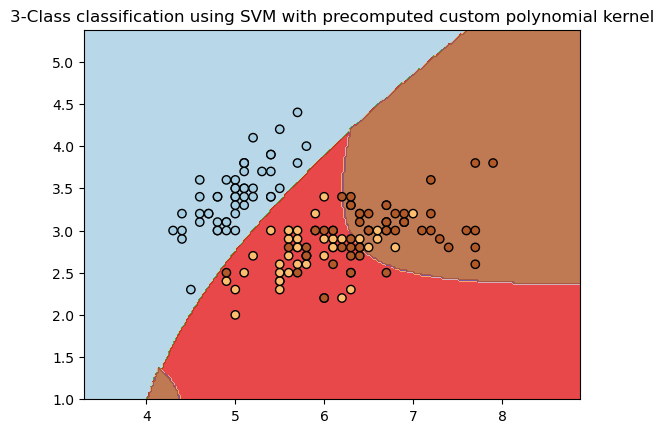

In [5]:
# Load some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features
Y = iris.target

# Define a custom polynomial kernel (different from the standard polynomial kernel)
def custom_poly_kernel(X, Y, c=1.0, d=3):
    """
    Custom Polynomial Kernel:
    K(X, Y) = (X @ Y.T + c)^d
    """
    return (np.dot(X, Y.T) + c) ** d

# Compute the kernel matrix using the custom polynomial kernel
kernel_matrix = custom_poly_kernel(X, X)

# Create an SVM classifier with precomputed kernel
clf = svm.SVC(kernel='precomputed')
clf.fit(kernel_matrix, Y)

# For plotting decision boundaries, we need to recompute the kernel matrix for the grid points
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_kernel = custom_poly_kernel(grid, X)

# Predict and plot decision boundaries
Z = clf.predict(grid_kernel)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using SVM with precomputed custom polynomial kernel")
plt.axis("tight")
plt.show()